## Imports

In [1]:
import json
from matplotlib.ticker import MaxNLocator
from  matplotlib import rcParams
from matplotlib import cycler
import matplotlib as mpl
import matplotlib.pyplot as plt 
import pandas as pd
import ast

## Plot Settings

In [2]:
# rcParams['xtick.direction'] = 'in'
rcParams['axes.grid'] = True
rcParams['grid.linestyle'] = '--'
# rcParams['markers.fillstyle'] = 'none'
# rcParams['axes.prop_cycle'] = cycler(
#     'linestyle', ["-", "--"]
# )

# enable usetex by setting it to True if LaTeX is installed
rcParams['text.usetex'] = False
rcParams['font.size'] = 16
rcParams['font.family'] = 'serif'

## Model Learning Logfile

In [3]:
log_dir = "/tmp/tmpb4sobp0x/c3logs/c3/2021_06_26_T_23_45_53/"

In [4]:
logfile = os.path.join(log_dir, "model_learn.log")
with open(logfile, 'r') as f:
    log = f.readlines()

## Clean up Model Learning Logs and make `DataFrame`

In [5]:
params_names = [item for sublist in (ast.literal_eval(log[3].strip('\n'))) for item in sublist]
print(params_names)

['Q1-anhar', 'Q1-freq']


In [6]:
data_list_dict = list()
for line in log[9:]:
    if line[0] == "{":
        temp_dict = ast.literal_eval(line.strip('\n'))
        for index, param_name in enumerate(params_names):
            temp_dict[param_name] = temp_dict['params'][index]
        temp_dict.pop('params')
        data_list_dict.append(temp_dict)

In [7]:
data_df = pd.DataFrame(data_list_dict)

## Summary of Model Learning Logs

In [8]:
data_df.describe()

,goal,Q1-anhar,Q1-freq
count,244.000000,2.440000e+02,2.440000e+02
mean,310.526415,-2.200768e+08,4.999966e+09
std,632.937443,2.605844e+07,1.023129e+06
min,-0.032443,-3.386952e+08,4.995935e+09
25%,83.943953,-2.338408e+08,4.999347e+09
50%,94.283628,-2.280254e+08,5.000282e+09
75%,209.354864,-2.081919e+08,5.000579e+09
max,4948.766458,-1.233434e+08,5.003645e+09


## Best Point

In [9]:
best_point_file = os.path.join(log_dir, 'best_point_model_learn.log')

In [15]:
with open(best_point_file, 'r') as f:
    best_point = f.read()
    best_point_log_dict = ast.literal_eval(best_point)

best_point_dict = dict(zip(params_names, best_point_log_dict['optim_status']['params']))
best_point_dict['goal'] = best_point_log_dict['optim_status']['goal']
print(best_point_dict)

{'Q1-anhar': -210003334.2322976, 'Q1-freq': 5000002442.982478, 'goal': -0.0324427790597494}


## Anharmonicity

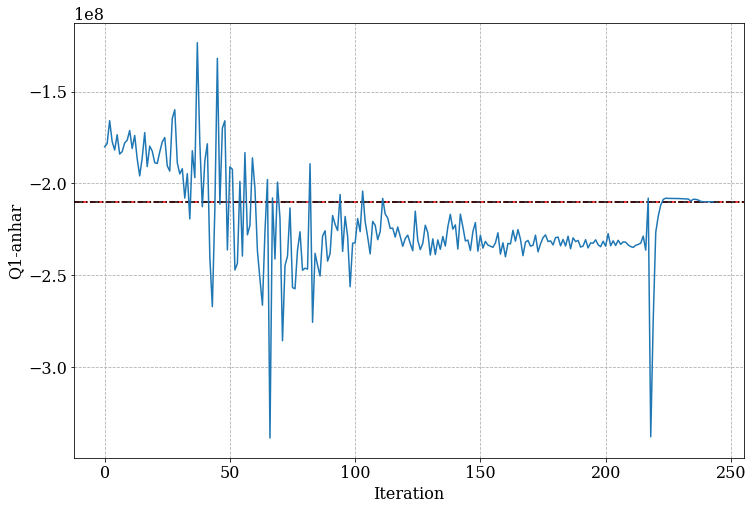

In [11]:
plot_item = 'Q1-anhar'
true_value = -210e6

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('Iteration')
ax.set_ylabel(plot_item)
ax.axhline(y=true_value, color="red", linestyle="--")
ax.axhline(y=best_point_dict[plot_item], color="black", linestyle="-.")
ax.plot(data_df[plot_item])

## Frequency

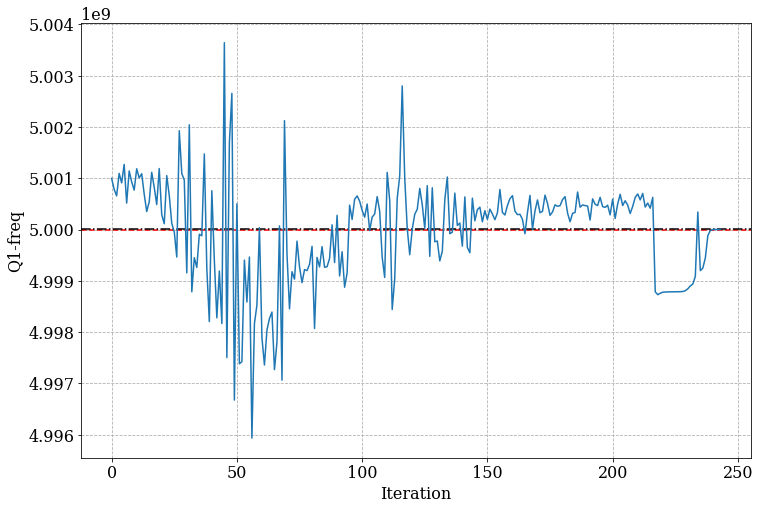

In [12]:
plot_item = 'Q1-freq'
true_value = 5e9

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('Iteration')
ax.set_ylabel(plot_item)
ax.axhline(y=true_value, color="red", linestyle="--")
ax.axhline(y=best_point_dict[plot_item], color="black", linestyle="-.")
ax.plot(data_df[plot_item])

## Goal Function

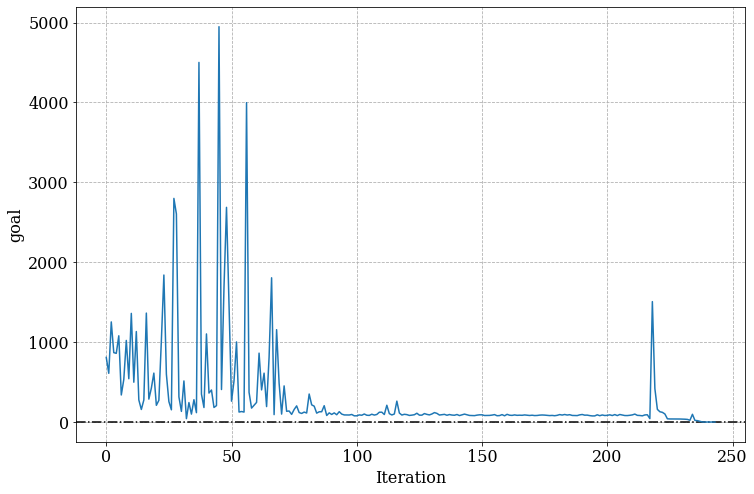

In [16]:
plot_item = 'goal'

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('Iteration')
ax.axhline(y=best_point_dict[plot_item], color="black", linestyle="-.")
ax.set_ylabel(plot_item)

ax.plot(data_df[plot_item])